In [101]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
import pickle
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import time

from tqdm import tqdm

from Homogenenous_Trajectory_Network import HomogeneousTrajectoryNetwork
from Heterogeneous_Trajectory_Network import HeterogeneousTrajectoryNetwork
from Dynamic_SEIR import DynamicSEIR
from Heterogeneous_SEIR import HeterogeneousSEIR


<h2>Utility Functions</h2>

In [144]:
def plot_data_with_percentiles(dynamic, homogeneous, heterogeneous, group, t_incubation, t_recovery, infect_rate):
    groups = ["susceptible", "exposed", "infected", "recovered"]
    time_axis = list(range(heterogeneous.shape[1]))
    
    # Plotting median
#     plt.scatter(time_axis, homogeneous[1,:,group], label='Homogeneous', color='green', s=2)
#     plt.scatter(time_axis, heterogeneous[1,:,group], label='Heterogeneous', color='red', s=2)
#     plt.scatter(time_axis, dynamic[1,:,group], label='Dynamic', color='black', s=2)
    plt.plot(time_axis, homogeneous[1,:,group], color='green', alpha=0.5, linewidth=2, label='Homogeneous')
    plt.plot(time_axis, heterogeneous[1,:,group], color='red', alpha=0.5, linewidth=2, label='Heterogeneous')
    plt.plot(time_axis, dynamic[1,:,group], color='black', alpha=0.5, linewidth=2, label='Dynamic')

    # Plot 5th 
    plt.plot(time_axis, homogeneous[0,:,group], color='green', alpha=0.5, linewidth=1)
    plt.plot(time_axis, heterogeneous[0,:,group], color='red', alpha=0.5, linewidth=1)
    plt.plot(time_axis, dynamic[0,:,group], color='black', alpha=0.5, linewidth=1)
    
    # Plot 95th 
    plt.plot(time_axis, homogeneous[2,:,group], color='green', alpha=0.5, linewidth=1)
    plt.plot(time_axis, heterogeneous[2,:,group], color='red', alpha=0.5, linewidth=1)
    plt.plot(time_axis, dynamic[2,:,group], color='black', alpha=0.5, linewidth=1)

    # Set specific ticks on the y-axis
    plt.yticks([0, 100, 200, 300, 400])
    plt.ylim(0, 60)

    # Customize the plot as needed
    plt.xlabel('Time(days)')
    plt.ylabel("Number of {}".format(groups[group]))
    plt.legend()
    plt.title("t_incubation = {} days, t_recovery = {} days, infect_rate = {} s\u207B\u00B9".format(
            t_incubation, t_recovery, infect_rate))

    # Show the plot
    plt.show()
    
def plot_SEIR_data(S_data, E_data, I_data, R_data):
        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.plot(S_data, label='S')
        plt.plot(E_data, label='E')
        plt.plot(I_data, label='I')
        plt.plot(R_data, label='R')

        # Add labels, title, and legend
        plt.xlabel('Time(days)')
        plt.ylabel('Number of people')
        # plt.title("t_incubation = {} days, t_infectious = {} days, infect_rate = {} s\u207B\u00B9".format(
        #     t_incubation, t_recovery, infect_rate))
        plt.legend()

        # Show the plot
        plt.show()
        return

<h2>Data</h2>

In [104]:
data_file = "../data/synthetic_conference_attendance_data.pkl"
with open(data_file, 'rb') as file:
    repetitive_generating_dfs_for_network_model = pickle.load(file)["repetitive_generating_dfs"]


In [105]:
# data for the dynamic SEIR simulation
repetitive_generating_df_for_dynamic_model = pd.concat(repetitive_generating_dfs_for_network_model, axis=0, ignore_index=True)

In [143]:
repetitive_generating_df_for_dynamic_model

,id_1,id_2,end_moment,contact_duration,start_moment
0,1467,1591,20,20,0
1,1513,1591,60,20,40
2,1467,1591,260,80,180
3,1467,1591,360,60,300
4,1568,1591,520,80,440
...,...,...,...,...,...
1301995,1518,1616,8584520,80,8584440
1301996,1518,1655,8584520,40,8584480
1301997,1669,1754,8584520,7640,8576880
1301998,1518,1577,8584520,40,8584480


<h2>Parameters</h2>

In [108]:
infect_rate = 3e-4  # second^-1 3e-4

time_step = 1*24*60*60 # 1 day
t_incubation = 1*24*60*60 # 1 day
t_recovery = 2*24*60*60 # 2 days
t_loss_immunity = 110*24*60*60 # 110 days, should be large if Recovered cannot move back to Susceptible

RUNS = 15

In [109]:
unique_ids = pd.unique(pd.concat([repetitive_generating_dfs_for_network_model[0]["id_1"], repetitive_generating_dfs_for_network_model[0]["id_2"],repetitive_generating_dfs_for_network_model[1]["id_1"], repetitive_generating_dfs_for_network_model[1]["id_2"]]))

i_initial = set(random.sample(list(unique_ids), k=1))
i_initial = {1591}
s_initial = set(unique_ids) - i_initial

<h2>Dynamic SEIR</h2>

In [75]:
dynamic_SEIR = DynamicSEIR(df=repetitive_generating_df_for_dynamic_model, s_initial=s_initial, i_initial=i_initial, infect_rate=infect_rate, t_incubation=t_incubation, t_recovery=t_recovery, t_loss_immunity=t_loss_immunity)

In [87]:
times = []
for i in range(50):
    times.append(45080+i*2*24*60*60)
    times.append(117320+i*2*24*60*60)

S_data = [len(dynamic_SEIR.SEIR_population[time][0]) for time in times]
E_data = [len(dynamic_SEIR.SEIR_population[time][1]) for time in times]
I_data = [len(dynamic_SEIR.SEIR_population[time][2]) for time in times]
R_data = [len(dynamic_SEIR.SEIR_population[time][3]) for time in times]


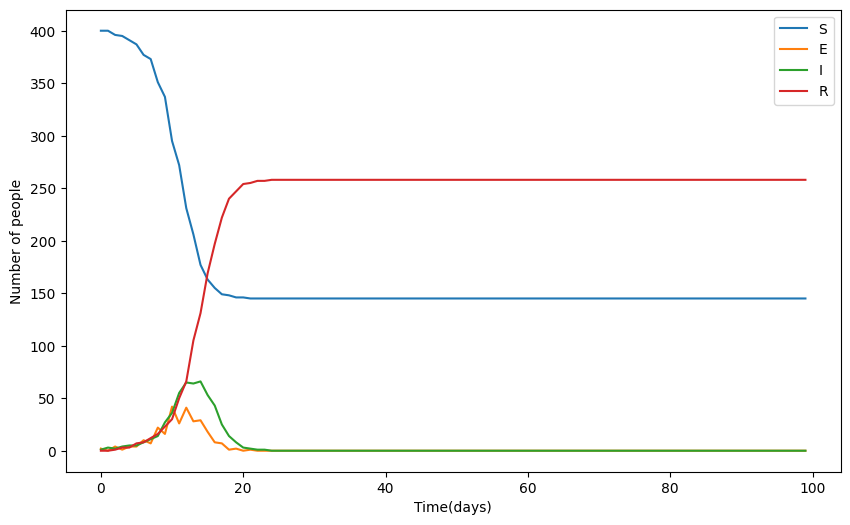

In [88]:
plot_SEIR_data(S_data=S_data, E_data=E_data, I_data=I_data, R_data=R_data)

<h2>Trajectory Networks</h2>

In [110]:
homogeneous_network = HomogeneousTrajectoryNetwork(list_of_dfs=repetitive_generating_dfs_for_network_model)

Building Trajectory Network:   0%|          | 0/100 [00:00<?, ?it/s]

Building Trajectory Network: 100%|██████████| 100/100 [01:05<00:00,  1.53it/s]


In [111]:
heterogeneous_network = HeterogeneousTrajectoryNetwork(list_of_dfs=repetitive_generating_dfs_for_network_model)

Building Trajectory Network:   0%|          | 0/100 [00:00<?, ?it/s]

Building Trajectory Network: 100%|██████████| 100/100 [01:06<00:00,  1.51it/s]


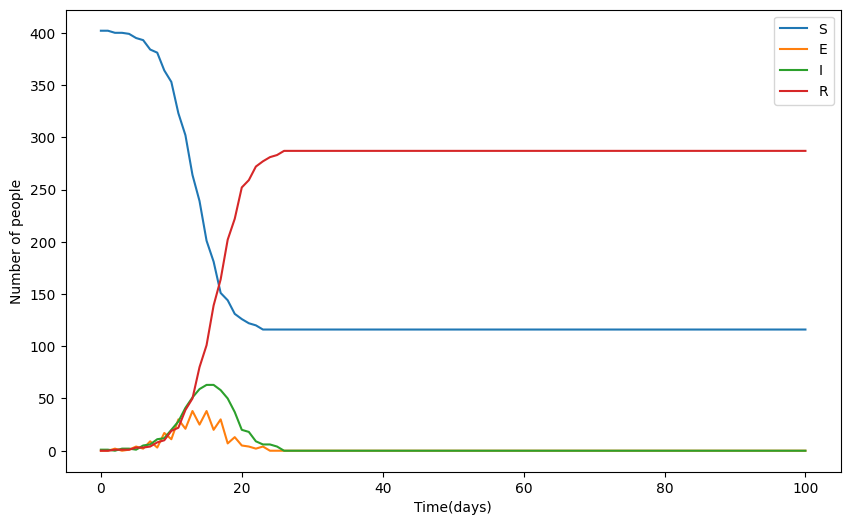

In [94]:
SEIR_homo_model = HeterogeneousSEIR(trajectory_network=homogeneous_network, s_initial= s_initial, i_initial=i_initial, infect_rate=infect_rate, t_incubation=t_incubation, t_recovery=t_recovery, time_step=time_step)
S_data = [len(SEIR_t[0]) for SEIR_t in SEIR_homo_model.SEIR]
E_data = [len(SEIR_t[1]) for SEIR_t in SEIR_homo_model.SEIR]
I_data = [len(SEIR_t[2]) for SEIR_t in SEIR_homo_model.SEIR]
R_data = [len(SEIR_t[3]) for SEIR_t in SEIR_homo_model.SEIR]
plot_SEIR_data(S_data=S_data, E_data=E_data, I_data=I_data, R_data=R_data)

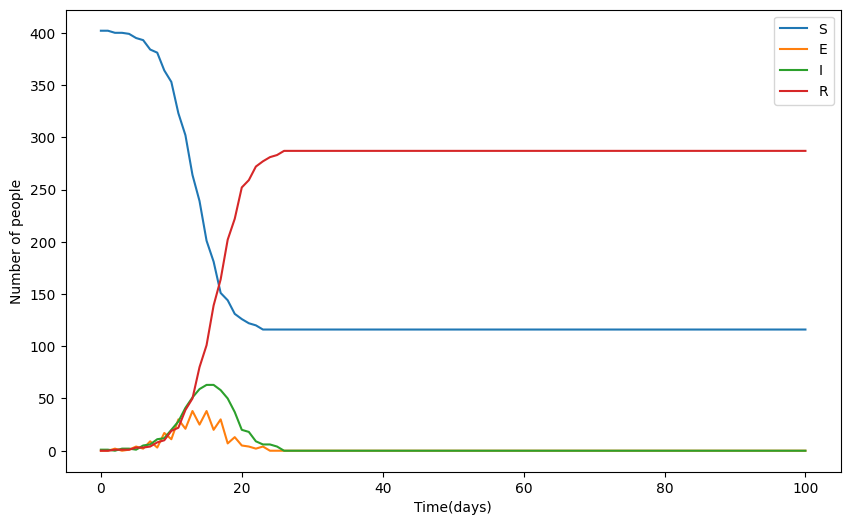

In [95]:
SEIR_hete_model = HeterogeneousSEIR(trajectory_network=heterogeneous_network, s_initial= s_initial, i_initial=i_initial, infect_rate=infect_rate, t_incubation=t_incubation, t_recovery=t_recovery, time_step=time_step)
S_data = [len(SEIR_t[0]) for SEIR_t in SEIR_homo_model.SEIR]
E_data = [len(SEIR_t[1]) for SEIR_t in SEIR_homo_model.SEIR]
I_data = [len(SEIR_t[2]) for SEIR_t in SEIR_homo_model.SEIR]
R_data = [len(SEIR_t[3]) for SEIR_t in SEIR_homo_model.SEIR]
plot_SEIR_data(S_data=S_data, E_data=E_data, I_data=I_data, R_data=R_data)

<h2>SEIR Models</h2>

In [112]:
SEIR_homo = [] 
SEIR_hete= []
SEIR_dynamic = [] 

for i in tqdm(range(RUNS), desc="Iterating"):

    SEIR_homo_model = HeterogeneousSEIR(trajectory_network=homogeneous_network, s_initial= s_initial, i_initial=i_initial, infect_rate=infect_rate, t_incubation=t_incubation, t_recovery=t_recovery, time_step=time_step)
    SEIR_hete_model = HeterogeneousSEIR(trajectory_network=heterogeneous_network,s_initial= s_initial, i_initial=i_initial, infect_rate=infect_rate, t_incubation=t_incubation, t_recovery=t_recovery, time_step=time_step)
    SEIR_dynamic_model = DynamicSEIR(df=repetitive_generating_df_for_dynamic_model, s_initial=s_initial, i_initial=i_initial, infect_rate=infect_rate, t_incubation=t_incubation, t_recovery=t_recovery, t_loss_immunity=t_loss_immunity)
    
    SEIR_homo.append(SEIR_homo_model.get_num_SEIR())
    SEIR_hete.append(SEIR_hete_model.get_num_SEIR())
    SEIR_dynamic.append(SEIR_dynamic_model.get_num_SEIR())

Iterating:   0%|          | 0/15 [00:00<?, ?it/s]

Iterating: 100%|██████████| 15/15 [4:51:49<00:00, 1167.28s/it]  


In [123]:
moments = np.sort(np.unique(repetitive_generating_df_for_dynamic_model[['start_moment', 'end_moment']]))
times = []
for i in range(50):
    times.append(45080+i*2*24*60*60)
    times.append(117320+i*2*24*60*60)

indexes = [np.where(moments == time)[0][0] for time in times]
indexes.insert(0,0)
len(indexes)

101

In [126]:
SEIR_dynamic_1 = [np.array(iter)[indexes] for iter in SEIR_dynamic]

In [130]:
len(SEIR_dynamic_1)

15

In [132]:
# size: RUNS x days x 4
array_SEIR_homo = np.array(SEIR_homo) 
array_SEIR_hete = np.array(SEIR_hete)
array_SEIR_dynamic = np.array(SEIR_dynamic_1)

percentiles = [5, 50, 95]
#size: 3 x days x 4
percentiles_SEIR_homo = np.stack([np.percentile(array_SEIR_homo, q, axis=0) for q in percentiles], axis=0)
percentiles_SEIR_hete = np.stack([np.percentile(array_SEIR_hete, q, axis=0) for q in percentiles], axis=0)
percentiles_SEIR_dynamic = np.stack([np.percentile(array_SEIR_dynamic, q, axis=0) for q in percentiles], axis=0)

In [133]:
array_SEIR_dynamic.shape

(15, 101, 4)

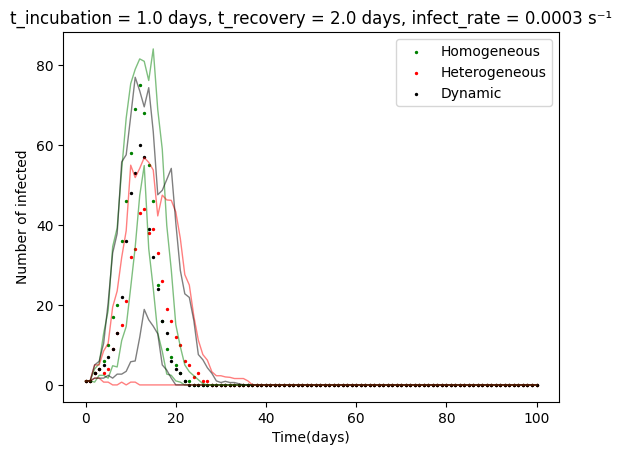

In [141]:
plot_data_with_percentiles(dynamic=percentiles_SEIR_dynamic, homogeneous=percentiles_SEIR_homo, heterogeneous=percentiles_SEIR_hete, group=2, t_incubation=t_incubation/time_step, t_recovery=t_recovery/time_step, infect_rate=infect_rate)

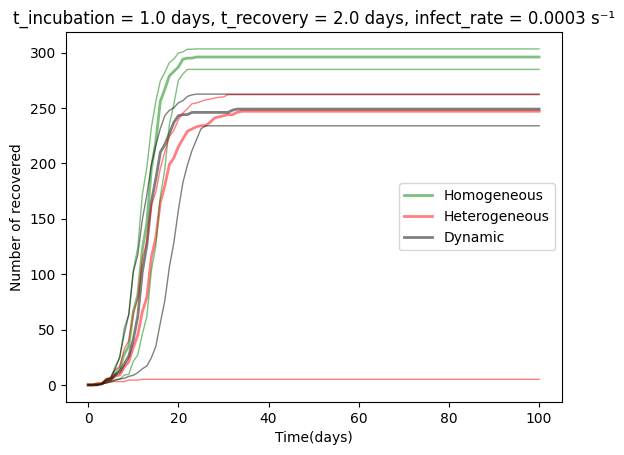

In [145]:
plot_data_with_percentiles(dynamic=percentiles_SEIR_dynamic, homogeneous=percentiles_SEIR_homo, heterogeneous=percentiles_SEIR_hete, group=3, t_incubation=t_incubation/time_step, t_recovery=t_recovery/time_step, infect_rate=infect_rate)

<h2> Comparison Charts</h2>

In [ ]:
#plot_data_with_percentiles(homogeneous=SEIR_homo_model.get_infectious(),heterogeneous=SEIR_hete_model.get_infectious(), y_label="Number of infectious", t_incubation=t_incubation, t_infectious=t_infectious, infect_rate=infect_rate)

In [ ]:
#plot_data_with_percentiles(homogeneous=SEIR_homo_model.get_recovered(),heterogeneous=SEIR_hete_model.get_recovered(), y_label="Number of recovered", t_incubation=t_incubation, t_infectious=t_infectious, infect_rate=infect_rate)

In [ ]:
# for index, df in enumerate(imported_dfs):
#     print(index)
#     print(df)

In [ ]:
# for i, G in enumerate(homogeneous_network.graphs):
#     print(f"Graph {i + 1}:")
#     print("Nodes:", G.nodes())
#     print("Edges:", G.edges())
#     for edge in G.edges(data=True):
#         print(f"Edge: {edge[0]} - {edge[1]}, Weight: {edge[2].get('weight', 'No weight')}")
#     print()

In [ ]:
# graphs = homogeneous_network.get_trajectory_network()
# G=graphs[0]
# print("Nodes:", G.nodes())
# for edge in G.edges(data=True):
#     print(f"Edge: {edge[0]} - {edge[1]}, Weight: {edge[2].get('weight', 'No weight')}")
# print()

In [ ]:
# from importlib import reload
# import Heterogeneous_SEIR

# # Force re-import of the module
# reload(Heterogeneous_SEIR)


In [ ]:
# for i in range(10):
#     print(SEIR_homo_model.SEIR[i])

In [ ]:
# graphs = heterogeneous_network.get_trajectory_network()
# G=graphs[0]
# print("Nodes:", G.nodes())
# for edge in G.edges(data=True):
#     print(f"Edge: {edge[0]} - {edge[1]}, Weight: {edge[2].get('weight', 'No weight')}")
# print()

In [ ]:
# for i in range(10):
#     print(SEIR_hete_model.SEIR[i])